In [2]:
import networkx as nx
from pyvis.network import Network

# Load the GML file
file_path = "data/power.gml"
G = nx.read_gml(file_path, label=None)

# Display basic graph information
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Konversi ke Pyvis Network
net = Network(notebook=True, height="750px", width="100%")

# Hitung derajat setiap node
degree_dict = dict(G.degree())

# Atur ukuran node berdasarkan derajat
for node, degree in degree_dict.items():
    net.add_node(
        node,
        size=degree * 2,  # Skala ukuran, sesuaikan faktor skala jika diperlukan
        title=f"Node: {node}, Degree: {degree}",  # Tambahkan informasi derajat saat dihover
    )

# Tambahkan edge
for edge in G.edges():
    net.add_edge(edge[0], edge[1])

# Tampilkan tombol pengaturan dan simpan
net.show_buttons(filter_=['physics'])  # Menambahkan tombol untuk pengaturan fisika
net.show("power_network_sized.html")


Number of nodes: 4941
Number of edges: 6594
power_network_sized.html


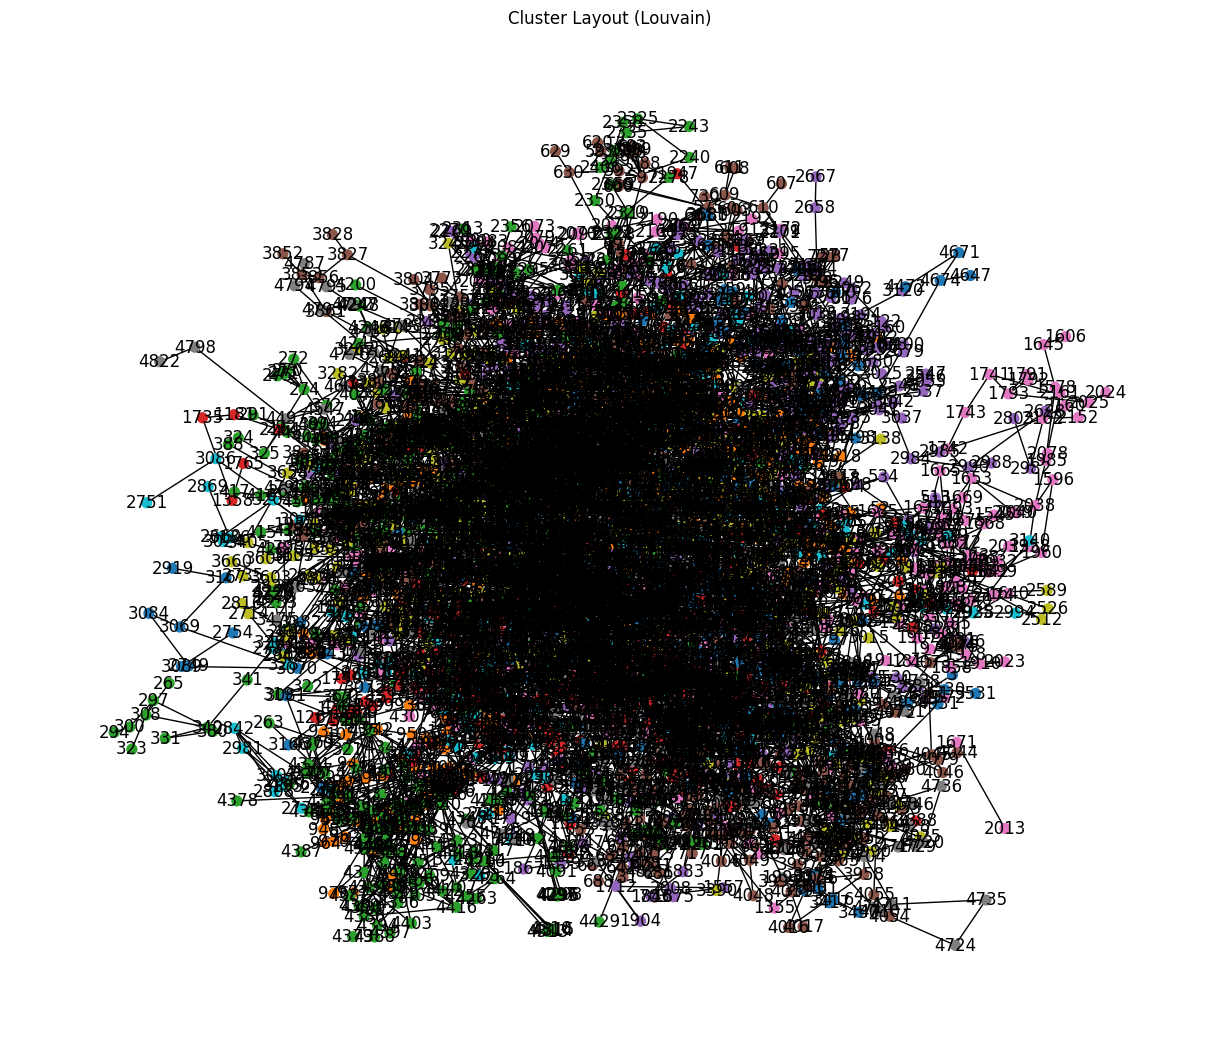

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain  # Untuk deteksi komunitas (Louvain)

# Load the graph
file_path = "data/power.gml"
G = nx.read_gml(file_path, label=None)

# Deteksi komunitas menggunakan Louvain
partition = community_louvain.best_partition(G)

# Group nodes berdasarkan komunitas
communities = {}
for node, comm in partition.items():
    communities.setdefault(comm, []).append(node)

# Layout global untuk cluster
pos_global = nx.spring_layout(G, seed=42)

# Layout lokal untuk setiap cluster
pos_cluster = {}
for comm, nodes in communities.items():
    # Circular layout untuk node dalam satu cluster
    subG = G.subgraph(nodes)
    pos_local = nx.circular_layout(subG)
    # Offset posisi lokal dengan posisi global cluster
    for node, coords in pos_local.items():
        pos_cluster[node] = pos_global[node] + coords * 0.1  # Adjust scaling

# Plot graf dengan warna berdasarkan komunitas
plt.figure(figsize=(12, 10))
colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos=pos_cluster, node_color=colors, with_labels=True, cmap=plt.cm.tab10, node_size=50)
plt.title("Cluster Layout (Louvain)")
plt.show()


In [5]:
import networkx as nx
import plotly.graph_objects as go

# Load the graph
file_path = "data/power.gml"
G = nx.read_gml(file_path, label=None)

# Generate subgraphs
subgraphs = list(nx.connected_components(G))

# Create a figure for each subgraph
fig = go.Figure()

for i, nodes in enumerate(subgraphs):
    subG = G.subgraph(nodes)
    pos = nx.spring_layout(subG)
    x = [pos[n][0] for n in subG.nodes()]
    y = [pos[n][1] for n in subG.nodes()]
    
    # Add trace for each subgraph
    fig.add_trace(go.Scatter(
        x=x, y=y, mode='markers+lines',
        marker=dict(size=10),
        name=f"Subgraph {i+1}",
        visible=(i == 0)  # Only the first subgraph visible initially
    ))

# Add dropdown menu
fig.update_layout(
    updatemenus=[{
        "buttons": [
            {"label": f"Subgraph {i+1}",
             "method": "update",
             "args": [{"visible": [j == i for j in range(len(subgraphs))]}]}
            for i in range(len(subgraphs))
        ],
        "direction": "down",
        "showactive": True,
    }]
)

fig.show()